<div dir=rtl align=center>

# بسمه تعالی

</div>
<div dir=rtl >

### نویسنده: محمدعلی مولائی
</div>

<div dir=rtl >

# حذف نویز تصاویر

<font size=5px>



در این بخش قرار است با استفاده از کلاس های
`sklearn.decomposition.KernelPCA`
و
`sklearn.decomposition.KernelPCA`
نویز اضافه شده به تصاویر موجود در دیتاست
`ORL`
را از بین ببریم.
`(denoising images)`
</br>
</br>

ابتدا در این قسمت کتابخانه های مورد نیاز را فراخوانی می کنیم.
</br>
برای استخراج عکس ها از فایل زیپ، از کتابخانه های
`os`, `zipfile`
و برای پردازش های اولیه روی تصویر از کتابخانه
`cv2`
استفاده می کنیم.
</br>
از کتابخانه
`numpy`
برای عملیات های ریاضیاتی استفاده می شود.
</br>
از کتابخانه
`sklearn`
کلاس های مورد نیاز برای پیاده سازی روش های
`PCA`
و
`KPCA`
فراخوانی می شود.
</br>
و در نهایت با استفاده از کتابخانه
`matplotlib`
شکل ها را نمایش می دهیم.


</div>

In [2]:
import numpy as np
import cv2
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

<div dir=rtl>
<font size=5px>

در این قسمت عکس ها از فایل زیپ درون پوشه ی
`attface_data`
قرار می گیرند و سپس فایل ها را درون لیست
`faces_dir`
قرار می دهد.
و در ادامه با استفاده از کتابخانه
`cv2`
متد های
`resize`
و
`imread`
روی آن انجام می شود.

</div>

In [3]:
with zipfile.ZipFile("./attface.zip", "r") as zip_ref:
    zip_ref.extractall("./attface_data")

faces_dir = []
for root, dirs, files in os.walk("./attface_data"):
    for file in files:
        if file.endswith(".pgm"):
            faces_dir.append(os.path.join(root, file))



faces = []
for path in faces_dir:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # resize
    img = img.flatten() / 255.0  # normalize
    faces.append(img)

<div dir=rtl>
<font size=5px>

سپس عکس های موجود در لیست را به آرایه تبدیل می کنیم.
</br>
در ادامه ارایه موجود را نیز به دسته
`Test`
و
`Train`
جدا سازی می کنیم.
</br>
در ادامه نویز تولید شده را به مجموعه اضافه می کنیم.

</div>

In [4]:
X = np.array(faces)

# Split data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

<div dir=rtl>
<font size=5px>

در ادامه یک تابع تعریف شده برای به نمایش گذاشتن تصاویر به دست آمده.
مقدار آرگومان متد
`reshape`
باید مثل قسمت بالاتر روی
(64,64)
باشد.
</br>
هر بار عکس 16 نفر از 40 نفر را در 4 ردیف و 4 ستون نمایش می دهیم.
</div>

In [5]:
def plot_digits(X, title):

    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((64, 64)), cmap="gray")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

<div dir=rtl>
<font size=5px>

در این قسمت دو مجموعه داده های تستی بدون نویز و همین طور داده های تستی دارای نویز را به نمایش می گذاریم.

</div>

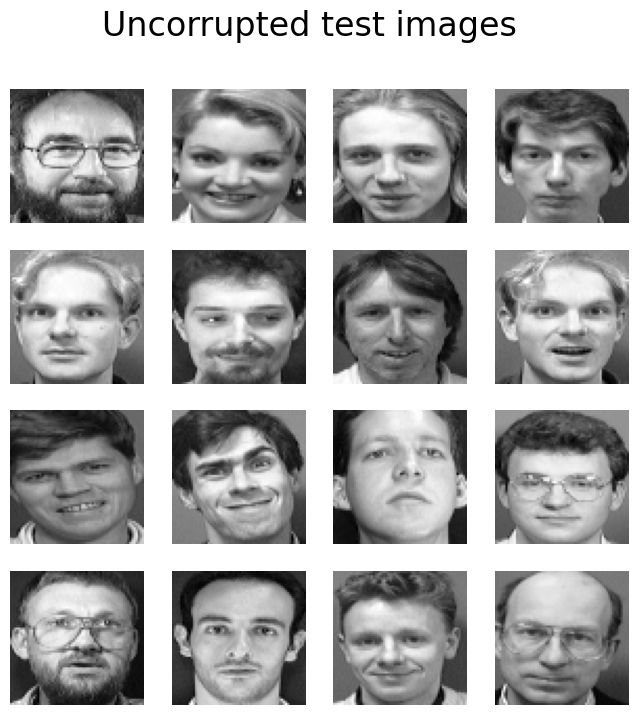

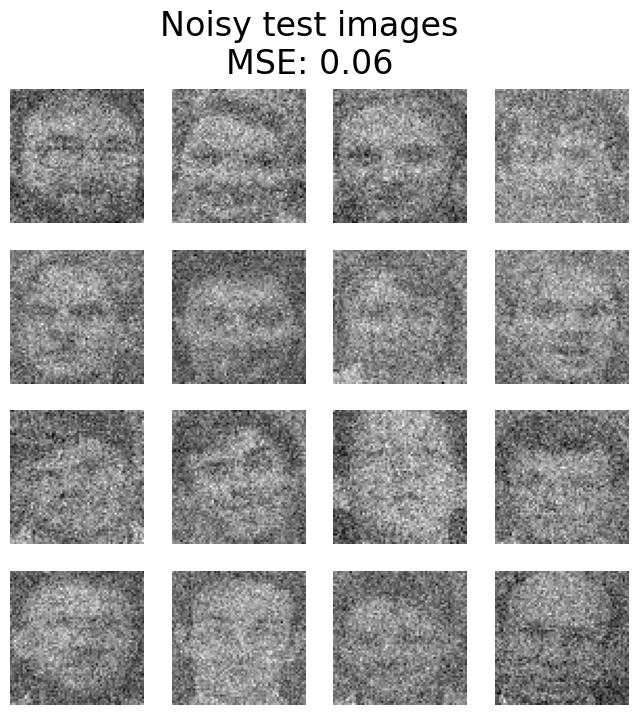

In [6]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

<div dir=rtl>
<font size=5px>

در این قسمت روش
`PCA`
و
`KPCA`
روی
داده ها پیاده سازی می شوند.
</div>

In [24]:
pca = PCA(n_components=32, random_state=42)
kernel_pca = KernelPCA(
    n_components=400,
    kernel="rbf",
    gamma=1e-3,
    fit_inverse_transform=True,
    alpha=5e-3,
    random_state=42,
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

<div dir=rtl>
<font size=5px>

برای تغییر نتایج
`(MSE)`
 روش
`PCA`
می توان مقدار مولفه های
`random_state`
و
`n_components`
را تغییر داد.
با کمتر کردن مقدار
`n_components`
تعداد مولفه های اصلی یا
`Principal Components`
کمتر می شود و
مقدار
`MSE`
بیشتر می شود.



در روش
`KPCA`
با تغییر مولفه های
`gamma`, `alpha`,
`random_state`
و
`n_components`
نتایج به دست آمده مرتبط با آن تغییر می کند.
</div>

<div dir=rtl>
<font size=5px>

در این قسمت تصاویر بازسازی شده به نمایش گذاسته می شوند.

</div>

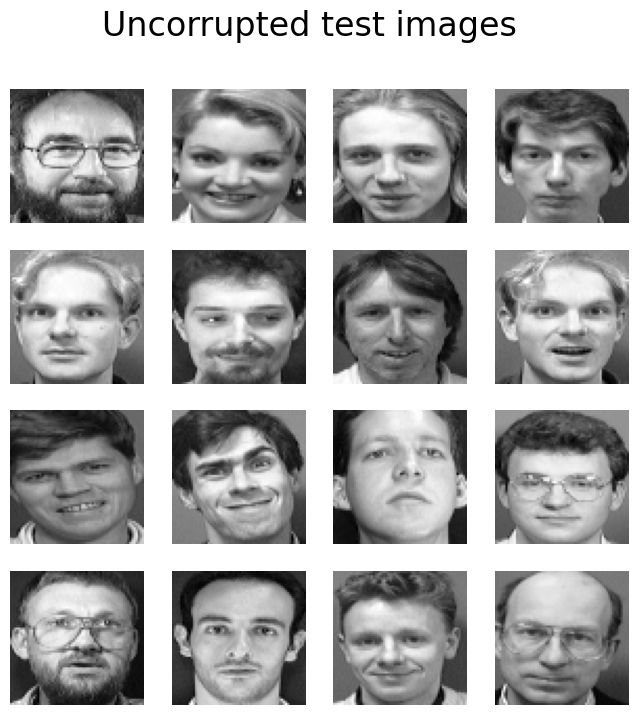

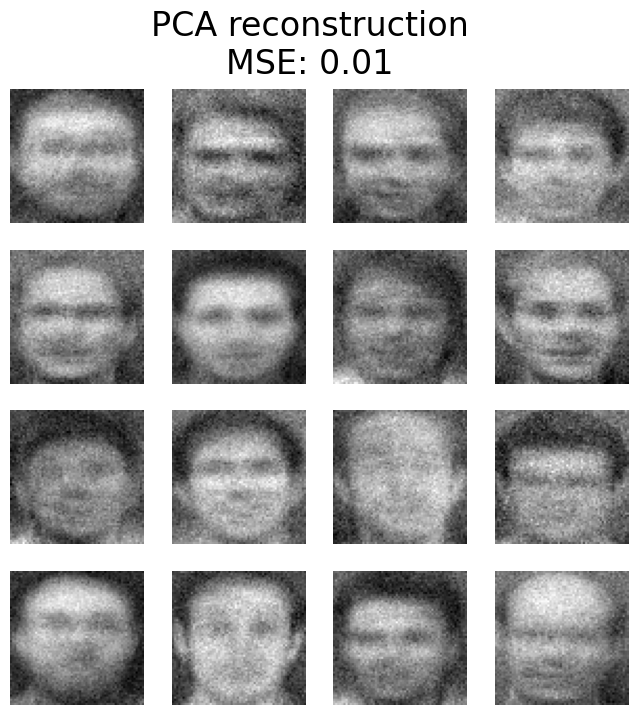

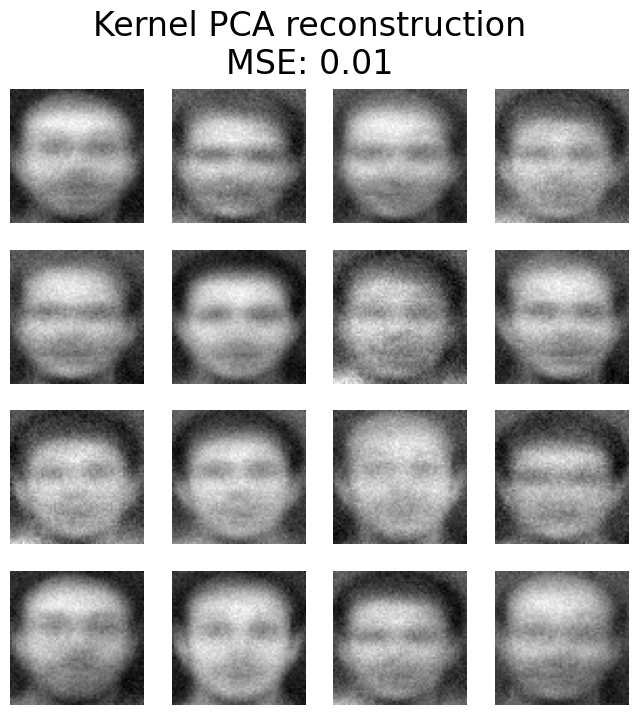

In [25]:
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)
plot_digits(
    X_reconstructed_kernel_pca,
    (
        "Kernel PCA reconstruction\n"
        f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}"
    ),
)
plt.show()